In [1]:
import numpy as np
import pandas as pd 
train_df = pd.read_csv('../input/projectai/train.csv')
test_df = pd.read_csv('../input/projectai/test.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   image_name                   945 non-null    object
 1   image_url                    945 non-null    object
 2   height                       945 non-null    int64 
 3   width                        945 non-null    int64 
 4   rotation_angle               945 non-null    int64 
 5   annotations/0/id             945 non-null    object
 6   annotations/0/category_name  945 non-null    object
 7   annotations/0/area           945 non-null    int64 
 8   annotations/0/creator        945 non-null    object
 9   annotations/0/keypoints/0    945 non-null    int64 
 10  annotations/0/keypoints/1    945 non-null    int64 
 11  annotations/0/keypoints/2    945 non-null    int64 
 12  annotations/0/keypoints/3    945 non-null    int64 
 13  annotations/0/keypoints/4    945 no

In [2]:
keypoints_df = train_df.drop(train_df.columns[0:9],axis = 1)
keypoints_df = keypoints_df.drop(keypoints_df.columns[2::3],axis = 1)
y_train_size=train_df.columns[2:4]
y_train = np.array(keypoints_df,dtype='float')
y_train_size=train_df[['height','width']]
y_train_size=np.array(y_train_size,dtype='float')
for i in range(0,y_train.shape[1],2):
    for j in range(y_train.shape[0]):
        y_train[j][i]=y_train[j][i]/y_train_size[j][1]*240
        y_train[j][i+1]=y_train[j][i+1]/y_train_size[j][0]*240
print(y_train.shape)

(945, 20)


In [3]:
keytest_df = test_df.drop(test_df.columns[0:9],axis = 1)
keytest_df = keytest_df.drop(keytest_df.columns[2::3],axis = 1)
y_test = np.array(keytest_df,dtype='float')
y_test_size=test_df[['height','width']]
y_test_size=np.array(y_test_size,dtype='float')
for i in range(0,y_test.shape[1],2):
    for j in range(y_test.shape[0]):
        y_test[j][i]=y_test[j][i]/y_test_size[j][1]*240
        y_test[j][i+1]=y_test[j][i+1]/y_test_size[j][0]*240
print(y_test.shape)

(405, 20)


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
datagen = ImageDataGenerator(rescale=1./255)
data1=datagen.flow_from_directory('../input/projectai/DataProject_unlabelled_data_0/datasets',
                                          target_size=(240,240),batch_size=5,
                                          interpolation="lanczos",shuffle=False)
imageArr = []
for i in range(945):
        img=load_img('../input/projectai/DataProject_unlabelled_data_0/datasets/'+data1.filenames[i],
                 target_size=(240,240))
        img=img_to_array(img)
        img=img.reshape(1,240,240,3)
        img=img.astype('float')
        img/=255
        imageArr.append(img)
x_train = np.array(imageArr,dtype='float')
x_train = x_train.reshape(-1,240,240,3)
imageArr_test = []
for i in range(945,1350):
    img1=load_img('../input/projectai/DataProject_unlabelled_data_0/datasets/'+data1.filenames[i],
             target_size=(240,240))
    img1=img_to_array(img1)
    img1=img1.reshape(1,240,240,3)
    img1=img1.astype('float')
    img1/=255
    imageArr_test.append(img1)
x_test = np.array(imageArr_test,dtype='float')
x_test = x_test.reshape(-1,240,240,3)

Found 1350 images belonging to 1 classes.


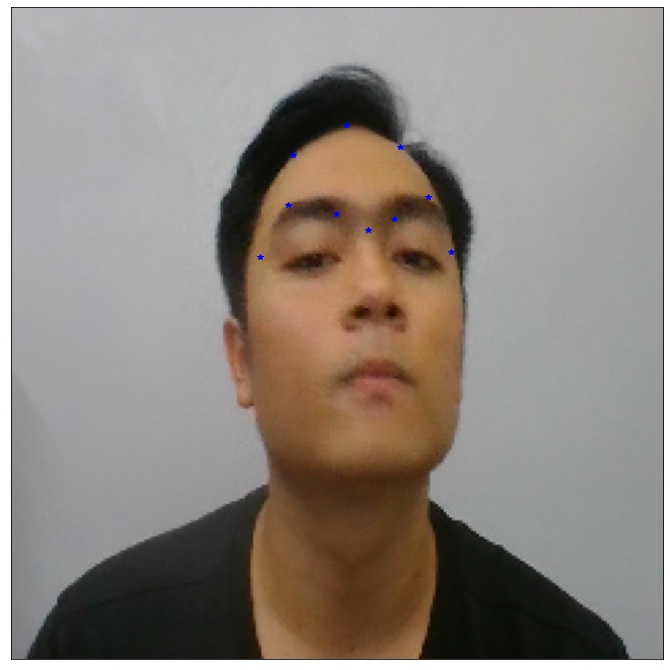

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
a=1
img=load_img('../input/projectai/DataProject_unlabelled_data_0/datasets/'+data1.filenames[a],
             target_size=(240,240))
plt.imshow(img)
for i in range(0,20,2):
    plt.plot(y_train[a][i],
             y_train[a][i+1],
             'b*',markersize=6)
plt.xticks([])
plt.yticks([])
plt.show()

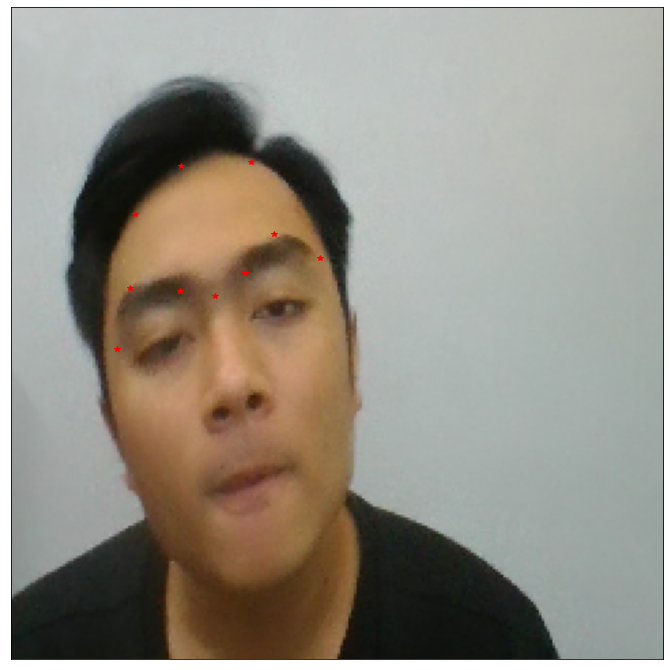

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
a=20
img=load_img('../input/projectai/DataProject_unlabelled_data_0/datasets/'+data1.filenames[a+945],
             target_size=(240,240))
plt.imshow(img)
for i in range(0,20,2):
    plt.plot(y_test[a][i],
             y_test[a][i+1],
             'r*',markersize=6)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D,MaxPooling2D,BatchNormalization, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Convolution2D(32,(3,3),padding='same',use_bias=False, input_shape=(240,240,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(1024, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(1024, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20))
model.compile(optimizer='Adamax',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

2022-06-23 03:09:40.696591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 03:09:40.830814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 03:09:40.831686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 03:09:40.833261: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 240, 32)      864       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 240, 240, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 240, 240, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 32)      9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 240, 240, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 240, 240, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 32)      0

In [8]:
history=model.fit(x_train,y_train,batch_size=4,epochs=500,validation_data=(x_test,y_test))

2022-06-23 03:09:44.340400: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 653184000 exceeds 10% of free system memory.
2022-06-23 03:09:45.023522: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 653184000 exceeds 10% of free system memory.
2022-06-23 03:09:45.512354: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500


2022-06-23 03:09:47.566562: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


237/237 [==============================] - 17s 36ms/step - loss: 394.8054 - accuracy: 0.8381 - val_loss: 1726.0714 - val_accuracy: 0.8272
Epoch 2/500
237/237 [==============================] - 7s 31ms/step - loss: 74.5506 - accuracy: 0.9016 - val_loss: 93.8279 - val_accuracy: 0.9333
Epoch 3/500
237/237 [==============================] - 7s 31ms/step - loss: 59.5286 - accuracy: 0.9090 - val_loss: 64.5292 - val_accuracy: 0.9407
Epoch 4/500
237/237 [==============================] - 7s 31ms/step - loss: 54.7616 - accuracy: 0.9312 - val_loss: 40.3084 - val_accuracy: 0.9407
Epoch 5/500
237/237 [==============================] - 7s 31ms/step - loss: 49.8372 - accuracy: 0.9439 - val_loss: 45.0108 - val_accuracy: 0.9556
Epoch 6/500
237/237 [==============================] - 7s 31ms/step - loss: 50.0604 - accuracy: 0.9460 - val_loss: 36.0001 - val_accuracy: 0.9407
Epoch 7/500
237/237 [==============================] - 7s 31ms/step - loss: 44.0149 - accuracy: 0.9587 - val_loss: 32.5023 - val_acc

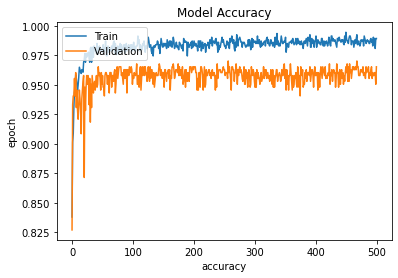

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [10]:
model.save('FinalProjectAI.h5')

In [11]:
from tensorflow.keras.models import load_model
model_1=load_model('FinalProjectAI.h5')

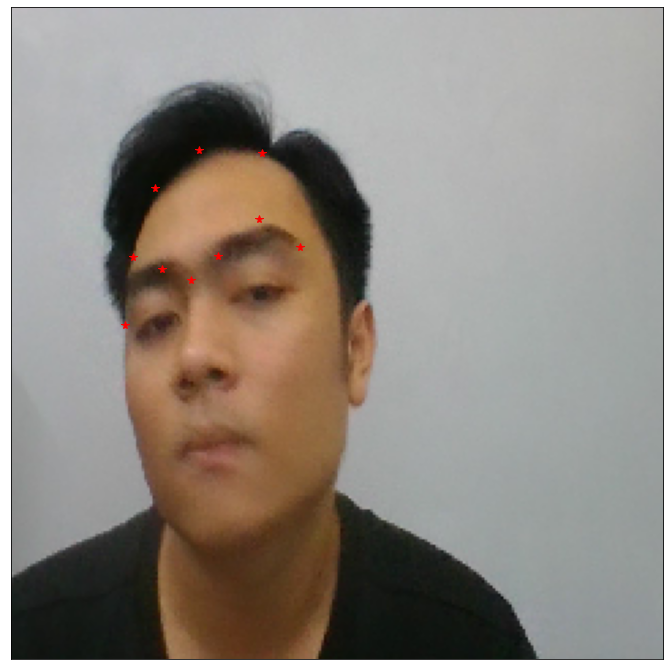

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
plt.figure(figsize=(12,12))
img=load_img('../input/projectai/picpredict/picpredict/1482.png',target_size=(240,240))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,240,240,3)
img=img.astype('float')
img/=255
y=model.predict(img)

for i in range(0,20,2):
    plt.plot(y[0][i],
             y[0][i+1],
             'r*',markersize=8)
plt.xticks([])
plt.yticks([])
plt.show()